# ZNEUS 2025 - HOUSES

### Vypracovali: Dobrydnev Nikolai & Šeliga Milan

# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Loading Data

In [2]:
df = pd.read_csv("houses.csv")
df

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
0,452600.0,8.3252,41.0,880.0,129.0,322.0,126.0,37.88,-122.23
1,358500.0,8.3014,21.0,7099.0,1106.0,2401.0,1138.0,37.86,-122.22
2,352100.0,7.2574,52.0,1467.0,190.0,496.0,177.0,37.85,-122.24
3,341300.0,5.6431,52.0,1274.0,235.0,558.0,219.0,37.85,-122.25
4,342200.0,3.8462,52.0,1627.0,280.0,565.0,259.0,37.85,-122.25
...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25.0,1665.0,374.0,845.0,330.0,39.48,-121.09
20636,77100.0,2.5568,18.0,697.0,150.0,356.0,114.0,39.49,-121.21
20637,92300.0,1.7000,17.0,2254.0,485.0,1007.0,433.0,39.43,-121.22
20638,84700.0,1.8672,18.0,1860.0,409.0,741.0,349.0,39.43,-121.32


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_house_value  20640 non-null  float64
 1   median_income       20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   latitude            20640 non-null  float64
 8   longitude           20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


#### Features

In [4]:
df.head()

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
0,452600.0,8.3252,41.0,880.0,129.0,322.0,126.0,37.88,-122.23
1,358500.0,8.3014,21.0,7099.0,1106.0,2401.0,1138.0,37.86,-122.22
2,352100.0,7.2574,52.0,1467.0,190.0,496.0,177.0,37.85,-122.24
3,341300.0,5.6431,52.0,1274.0,235.0,558.0,219.0,37.85,-122.25
4,342200.0,3.8462,52.0,1627.0,280.0,565.0,259.0,37.85,-122.25


Looking at the table, we can tell that each observation represent some complex of apartments/houses.

`median_income` most problably represented in tens of thousands US dollars. 

`median_house_value` represented just in US dollars.

### Cleaning Data

#### Missing Data

In [5]:
df.isnull().sum()

median_house_value    0
median_income         0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
latitude              0
longitude             0
dtype: int64

Dataset has no missing values at all

#### Duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

Dataset has no duplicates either

#### Data Types

In [7]:
df.dtypes

median_house_value    float64
median_income         float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
latitude              float64
longitude             float64
dtype: object

Types are correct, although `total_rooms`, `total_bedrooms` do not require float type

In [8]:
(df["total_rooms"] % 1 == 0).all() # all values of total rooms are integers

np.True_

In [9]:
df["total_rooms"] = df["total_rooms"].astype("int")

In [10]:
(df["total_bedrooms"] % 1 == 0).all() # all values of total bedrooms are integers

np.True_

In [11]:
df["total_bedrooms"] = df["total_bedrooms"].astype("int")

In [12]:
(df["households"] % 1 == 0).all() # all values of households are integers

np.True_

In [13]:
df["households"] = df["households"].astype("int")

In [14]:
(df["population"] % 1 == 0).all() # all values of population are integers

np.True_

In [15]:
df["population"] = df["population"].astype("int")

In [16]:
(df["median_house_value"] % 1 == 0).all() # all values of median_house_value are integers

np.True_

In [17]:
df["median_house_value"] = df["median_house_value"].astype("int")

In [18]:
(df["housing_median_age"] % 1 == 0).all() # all values of median_house_value are integers

np.True_

In [19]:
df["housing_median_age"] = df["housing_median_age"].astype("int")

In [20]:
df.head()

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
0,452600,8.3252,41,880,129,322,126,37.88,-122.23
1,358500,8.3014,21,7099,1106,2401,1138,37.86,-122.22
2,352100,7.2574,52,1467,190,496,177,37.85,-122.24
3,341300,5.6431,52,1274,235,558,219,37.85,-122.25
4,342200,3.8462,52,1627,280,565,259,37.85,-122.25


In [21]:
df.dtypes

median_house_value      int64
median_income         float64
housing_median_age      int64
total_rooms             int64
total_bedrooms          int64
population              int64
households              int64
latitude              float64
longitude             float64
dtype: object

#### Outliers

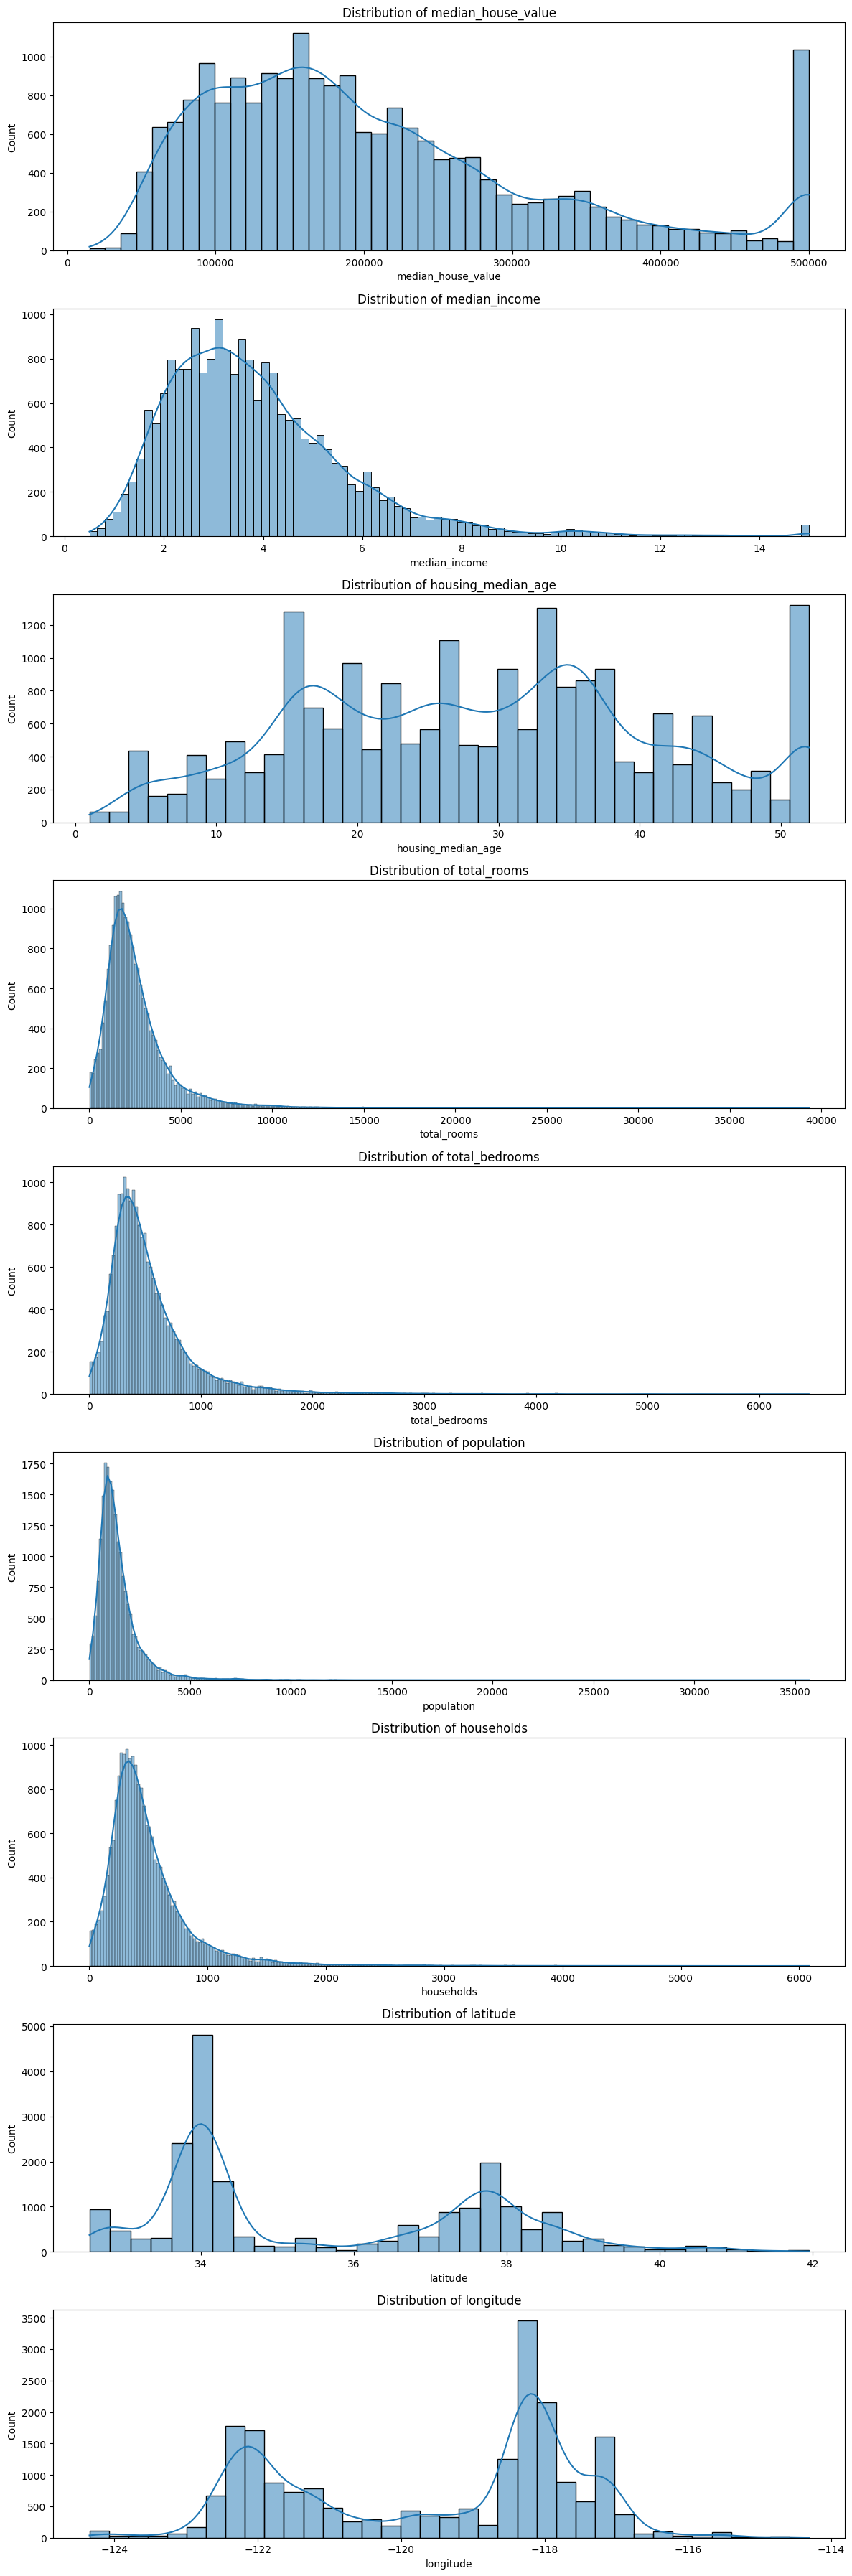

In [22]:
cols = len(df.columns)
plt.figure(figsize=(12, 4 * cols))

for i, col in enumerate(df.columns, 1):
    plt.subplot(cols, 1, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

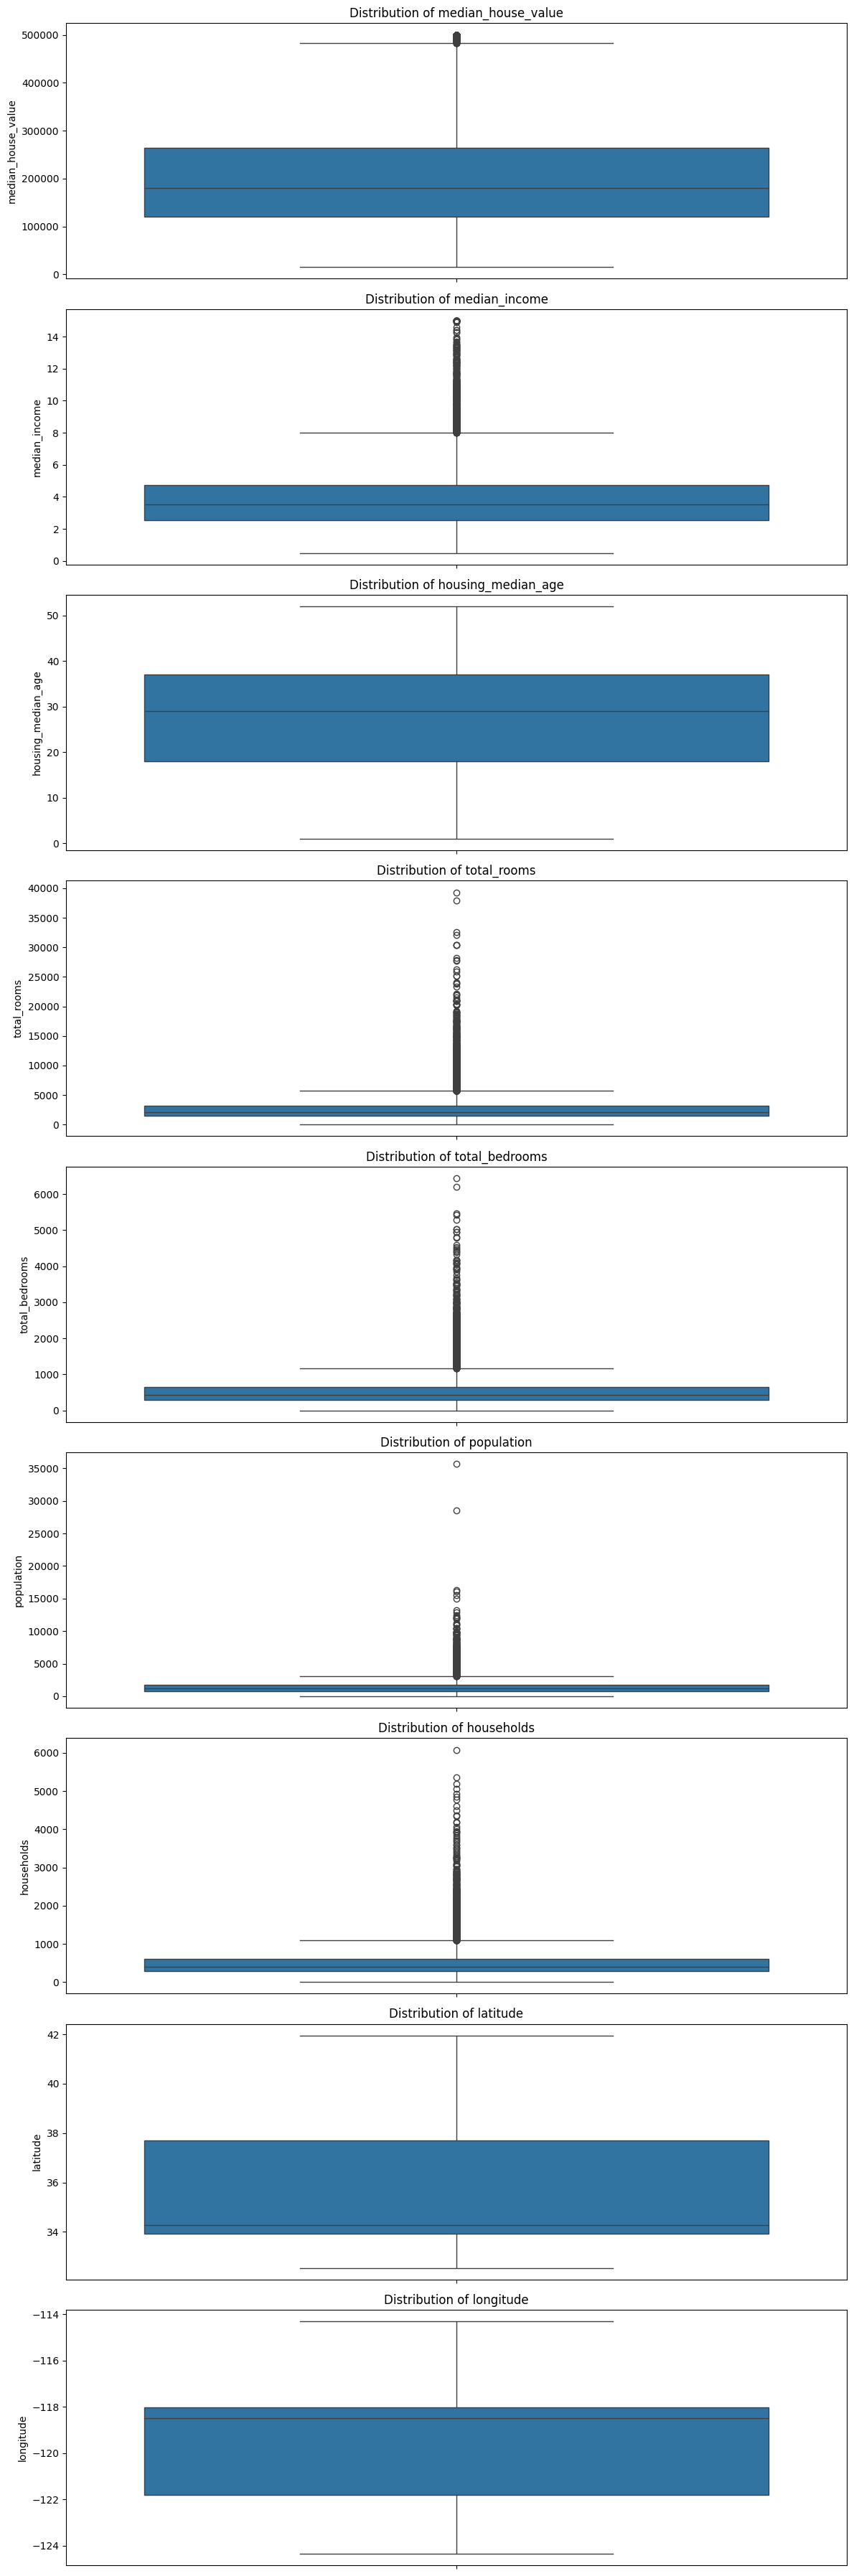

In [23]:
cols = len(df.columns)
plt.figure(figsize=(12, 4 * cols))

for i, col in enumerate(df.columns, 1):
    plt.subplot(cols, 1, i)
    sns.boxplot(df[col])
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [24]:
for column in df.columns[:-2]:
    print(column, df[column].skew())

median_house_value 0.9777632739098342
median_income 1.6466567021344463
housing_median_age 0.06033063759913685
total_rooms 4.147343450632158
total_bedrooms 3.453072752387383
population 4.935858226727124
households 3.4104377116671474


All are right-skewed

In [25]:
df.describe()

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000


#### Correlation

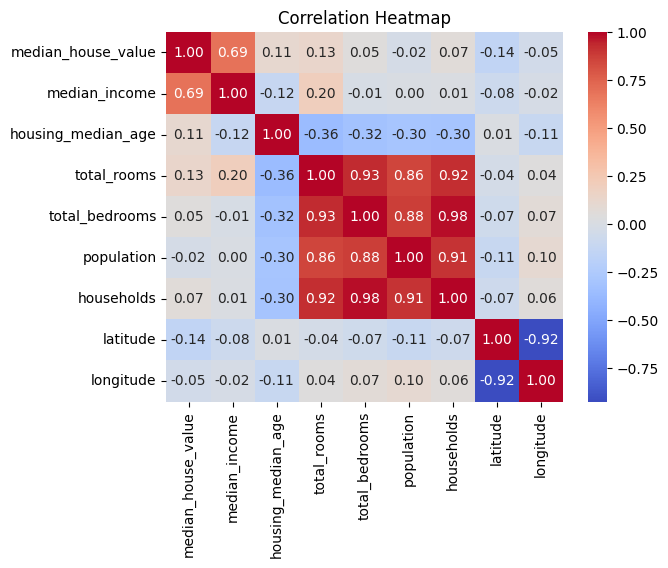

In [26]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

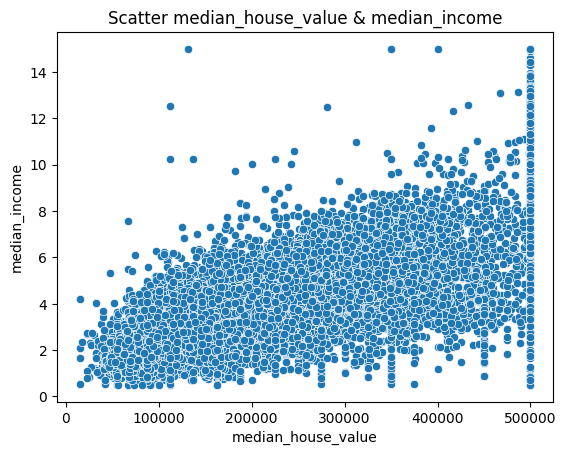

In [27]:
sns.scatterplot(x='median_house_value', y='median_income', data=df)
plt.title("Scatter median_house_value & median_income")
plt.show()

#### Transformation

In [28]:
trans_cols = df.drop(columns=["median_house_value", "longitude", "latitude"])
trans_cols
df_trans = df.copy()
df_trans[trans_cols.columns] = np.log1p(df_trans[trans_cols.columns])
df_trans

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
0,452600,2.232720,3.737670,6.781058,4.867534,5.777652,4.844187,37.88,-122.23
1,358500,2.230165,3.091042,8.867850,7.009409,7.784057,7.037906,37.86,-122.22
2,352100,2.111110,3.970292,7.291656,5.252273,6.208590,5.181784,37.85,-122.24
3,341300,1.893579,3.970292,7.150701,5.463832,6.326149,5.393628,37.85,-122.25
4,342200,1.578195,3.970292,7.395108,5.638355,6.338594,5.560682,37.85,-122.25
...,...,...,...,...,...,...,...,...,...
20635,78100,0.940124,3.258097,7.418181,5.926926,6.740519,5.802118,39.48,-121.09
20636,77100,1.268861,2.944439,6.548219,5.017280,5.877736,4.744932,39.49,-121.21
20637,92300,0.993252,2.890372,7.720905,6.186209,6.915723,6.073045,39.43,-121.22
20638,84700,1.053336,2.944439,7.528869,6.016157,6.609349,5.857933,39.43,-121.32


Plotting distribution of transformed data

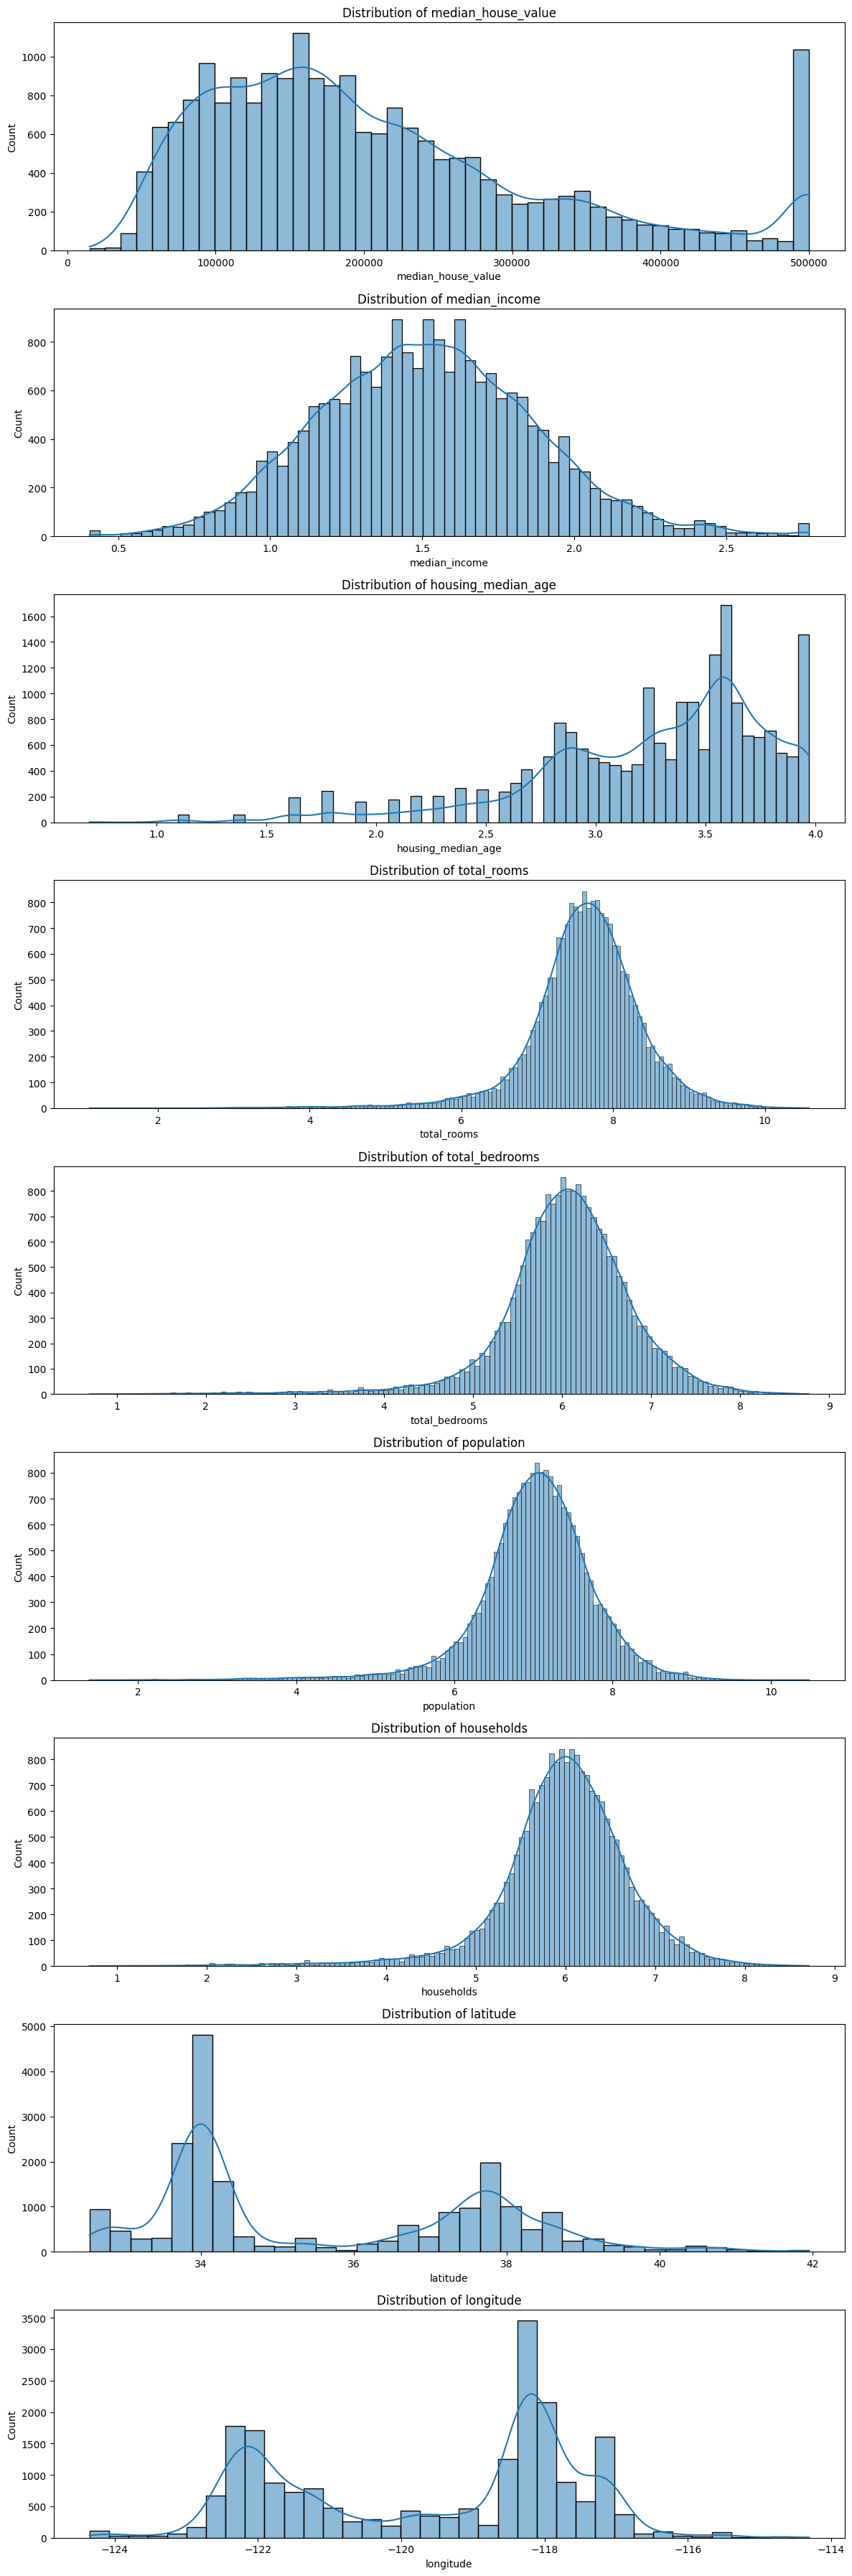

In [29]:
cols = len(df_trans.columns)
plt.figure(figsize=(12, 4 * cols))

for i, col in enumerate(df_trans.columns, 1):
    plt.subplot(cols, 1, i)
    sns.histplot(df_trans[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

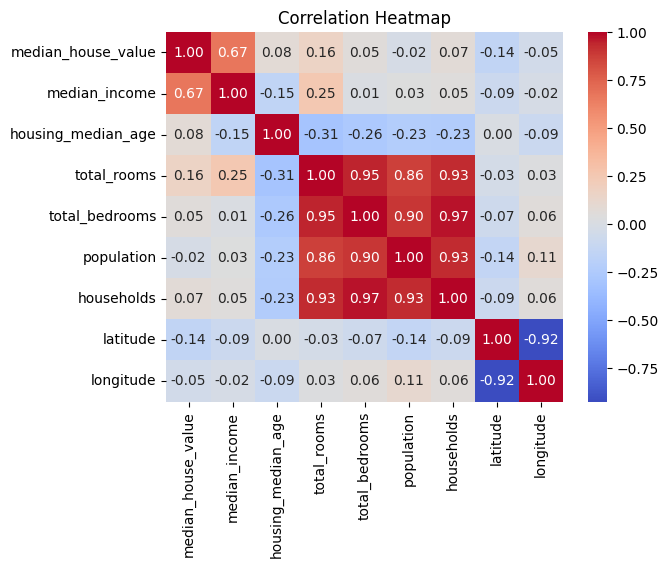

In [30]:
corr = df_trans.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### Normalization

Because `housing_median_age` is not normally distributed, min-max normalization will be applied to it:

In [31]:
df_norm = df_trans.copy()
cols = ["housing_median_age"]
df_norm[cols] = (df[cols] - df[cols].min()) / (df[cols].max() - df[cols].min())
df_norm[cols]

,housing_median_age
0,0.784314
1,0.392157
2,1.000000
3,1.000000
4,1.000000
...,...
20635,0.470588
20636,0.333333
20637,0.313725
20638,0.333333


Other attributes can be normalized using Z-score as they follow normal distribution:

In [35]:
cols = df_norm.drop(columns=["housing_median_age"]).columns
df_norm[cols] = (df[cols] - df[cols].mean()) / df[cols].std()
df_norm

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
0,2.129580,2.344709,0.784314,-0.804800,-0.970683,-0.974405,-0.977009,1.052523,-1.327803
1,1.314124,2.332181,0.392157,2.045841,1.348617,0.861418,1.669921,1.043159,-1.322812
2,1.258663,1.782656,1.000000,-0.535733,-0.825875,-0.820757,-0.843616,1.038478,-1.332794
3,1.165072,0.932945,1.000000,-0.624199,-0.719049,-0.766010,-0.733764,1.038478,-1.337785
4,1.172871,-0.012881,1.000000,-0.462393,-0.612224,-0.759828,-0.629142,1.038478,-1.337785
...,...,...,...,...,...,...,...,...,...
20635,-1.115777,-1.216099,0.470588,-0.444974,-0.389077,-0.512579,-0.443438,1.801603,-0.758808
20636,-1.124443,-0.691576,0.333333,-0.888682,-0.920831,-0.944382,-1.008396,1.806285,-0.818702
20637,-0.992722,-1.142566,0.313725,-0.174991,-0.125575,-0.369528,-0.174037,1.778194,-0.823693
20638,-1.058583,-1.054557,0.333333,-0.355591,-0.305991,-0.604415,-0.393743,1.778194,-0.873605


Dataframe is now saved to be used in next stage:

In [36]:
# df_norm.to_pickle('houses.pkl')